In [2]:
import numpy as np
import pandas as pd
import xlrd

import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq, ifft, rfft

def fft_from_data_frame(data_frame):
    fs= 114e3
    signal_set = []
    for row in data_frame.values:
        fft_data = fft(row, n=row.size)/row.size
        freq = fftfreq(row.size, d=1/fs)
        cut_high_signal = np.abs(fft_data).copy()
        cut_high_signal[(freq > 50000)] = 0
        cut_high_signal[(freq < 30000)] = 0
        signal_without_0 = list(filter(lambda a: a != 0, cut_high_signal))
        signal_set.append(np.abs(signal_without_0))
    return signal_set

In [3]:
import glob

def get_fft_set(file_names):
    fft_set = []
    for front in file_names:
        data = pd.read_csv(front)
        fft_data = fft_from_data_frame(data)
        fft_set = fft_data + fft_set
    return fft_set

car_front_1 = glob.glob('./Documents/data_set/Result/67_Ford_Black_front/*_overall.csv')
car_front_2 = glob.glob('./Documents/data_set/Result/99_Fiesta_Purple_front/*_overall.csv')
car_side_1 = glob.glob('./Documents/data_set/Result/99_Fiesta_Purple_side/*_overall.csv')
car_side_2 = glob.glob('./Documents/data_set/Result/129_Skoda_Grey_side/*_overall.csv')
car_back_1 = glob.glob('./Documents/data_set/Result/26_Ford_Black_back/*_overall.csv')
car_back_2 = glob.glob('./Documents/data_set/Result/66_Ford_Purple_back/*_overall.csv')
motorbike_1 = glob.glob('./Documents/data_set/Result/92_CBF_Honda_side1/*_overall.csv')
motorbike_2 = glob.glob('./Documents/data_set/Result/92_CBF_Honda_side2/*_overall.csv')
cycle_1 = glob.glob('./Documents/data_set/Result/Cycle_side/*_overall.csv')
human_A = glob.glob('./Documents/data_set/Result/Human_A/*_overall.csv')
human_B = glob.glob('./Documents/data_set/Result/Human_B/*_overall.csv')
human_C = glob.glob('./Documents/data_set/Result/Human_C/*_overall.csv')
human_D = glob.glob('./Documents/data_set/Result/Human_D/*_overall.csv')
human_E = glob.glob('./Documents/data_set/Result/Human_E/*_overall.csv')
pillar_1 = glob.glob('./Documents/data_set/Result/Pillar_1/*_overall.csv')
pillar_2 = glob.glob('./Documents/data_set/Result/Pillar_2/*_overall.csv')
pillar_3 = glob.glob('./Documents/data_set/Result/Pillar_3/*_overall.csv')
stopper_1 = glob.glob('./Documents/data_set/Result/Stopper_1/*_overall.csv')
stopper_2 = glob.glob('./Documents/data_set/Result/Stopper_2/*_overall.csv')
# ventilator_1 = glob.glob('./Documents/data_set/Result/Ventilator_1/*_overall.csv')
wall_1 = glob.glob('./Documents/data_set/Result/Wall_1/*_overall.csv')
wall_2 = glob.glob('./Documents/data_set/Result/Wall_2/*_overall.csv')
wall_3 = glob.glob('./Documents/data_set/Result/Wall_3/*_overall.csv')

car_front_1_fft = get_fft_set(car_front_1)
car_front_2_fft = get_fft_set(car_front_2)
car_side_1_fft = get_fft_set(car_side_1)
car_side_2_fft = get_fft_set(car_side_2)
car_back_1_fft = get_fft_set(car_back_1)
car_back_2_fft = get_fft_set(car_back_2)
motorbike_1_fft = get_fft_set(motorbike_1)
motorbike_2_fft = get_fft_set(motorbike_2)
cycle_1_fft = get_fft_set(cycle_1)
human_A_fft = get_fft_set(human_A)
human_B_fft = get_fft_set(human_B)
human_C_fft = get_fft_set(human_C)
human_D_fft = get_fft_set(human_D)
human_E_fft = get_fft_set(human_E)
pillar_1_fft = get_fft_set(pillar_1)
pillar_2_fft = get_fft_set(pillar_2)
pillar_3_fft = get_fft_set(pillar_3)
stopper_1_fft = get_fft_set(stopper_1)
stopper_2_fft = get_fft_set(stopper_2)
# ventilator_1_fft = get_fft_set(ventilator_1)
wall_1_fft = get_fft_set(wall_1)
wall_2_fft = get_fft_set(wall_2)
wall_3_fft = get_fft_set(wall_3)

In [4]:
car = car_front_1_fft + car_front_2_fft + car_side_1_fft + car_side_2_fft + car_back_1_fft + car_back_2_fft
motorbike = motorbike_1_fft + motorbike_2_fft
cycle = cycle_1_fft
human = human_A_fft + human_B_fft + human_C_fft + human_D_fft + human_E_fft
pillar = pillar_1_fft + pillar_2_fft + pillar_2_fft
stopper = stopper_1_fft + stopper_2_fft
# ventilator = ventilator_1_fft
wall = wall_1_fft + wall_2_fft + wall_3_fft
 
print("Car:", len(car))
print("Mototrbike:", len(motorbike))
print("Cycle:", len(cycle))
print("Human:", len(human))
print("Pillar:", len(pillar))
print("Stopper:", len(stopper))
# print("Ventilator:", len(ventilator))
print("Wall:", len(wall))

Car: 11465
Mototrbike: 2129
Cycle: 302
Human: 1690
Pillar: 9407
Stopper: 2690
Wall: 5032


In [5]:
from sklearn.model_selection import train_test_split
def split(X_, index):
    y_ = [index]*len(X_)
    return train_test_split(X_, y_, test_size=0.40, random_state=42)

In [10]:
X_Human_train, X_Human_test, y_Human_train, y_Human_test = split(human, 'HUMAN')
Non_Human = car + motorbike + cycle + pillar + stopper + wall
X_Non_Human_train, X_Non_Human_test, y_Non_Human_train, y_Non_Human_test = split(Non_Human, 'NOT HUMAN')

X_Human_Non_Human_train = X_Human_train + X_Non_Human_train
y_Human_Non_Human_train = y_Human_train + y_Non_Human_train

X_Human_Non_Human_test = X_Human_test + X_Non_Human_test
y_Human_Non_Human_test = y_Human_test + y_Non_Human_test

from sklearn import preprocessing
normalized_X_Human_Non_Human_train = preprocessing.normalize(X_Human_Non_Human_train)
normalized_X_Human_Non_Human_train = preprocessing.scale(normalized_X_Human_Non_Human_train)

normalized_X_Human_Non_Human_test = preprocessing.normalize(X_Human_Non_Human_test)
normalized_X_Human_Non_Human_test = preprocessing.scale(normalized_X_Human_Non_Human_test)

In [7]:
print('X train data : ',np.array(X_Human_Non_Human_train).shape)
print('y train data : ',np.array(y_Human_Non_Human_train).shape)
print('X test data : ',np.array(X_Human_Non_Human_test).shape)
print('y test data : ',np.array(y_Hunam_Non_Human_test).shape)

X train data :  (19629, 90)
y train data :  (19629,)
X test data :  (13086, 90)
y test data :  (13086,)


In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix

def create_confusion_matrix(result, y_test):
    cm = confusion_matrix(result, y_test)
    import seaborn as sns
    import matplotlib.pyplot as plt     
    sum = np.sum(cm, axis=1)
    score = accuracy_score(result, y_test)

    from sklearn.metrics import precision_score, recall_score
    precision_CLASS_A = round(precision_score(y_test, result, average='binary',pos_label=labels[0]),2)
    precision_CLASS_B = round(precision_score(y_test, result, average='binary',pos_label=labels[1]),2)
    recall_CLASS_A = round(recall_score(y_test, result, average='binary',pos_label=labels[0]),2)
    recall_CLASS_B = round(recall_score(y_test, result, average='binary',pos_label=labels[1]),2)
    print('Precision: Class A',precision_CLASS_A)
    print('Precision: Class B',precision_CLASS_B)
    print('Recall: Class A',recall_CLASS_A)
    print('Recall: Class B',recall_CLASS_B)

    cm_new = np.append(cm[0], precision_CLASS_A)
    cm_new2 = np.append(cm[1], precision_CLASS_B)
    cm_new3 = np.array([recall_CLASS_A, recall_CLASS_B, score])
    cm = np.array([cm_new,cm_new2,cm_new3])


    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(cm, annot=True, ax = ax,linewidths=.5,fmt='g',cmap="Reds"); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    counter = 0
    for i in range(0,2):
        for j in range(0,3):
            percentage = cm[i][j]/sum[i]
            t = ax.texts[counter]
            if j == 2:
                t.set_text(str(cm[i][j]))
            else:
                t.set_text(str(cm[i][j]) + '\n' + str(round(percentage*100,2)) + " %")
            counter = counter + 1

    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels);

Precision: Class A 0.65
Precision: Class B 0.98
Recall: Class A 0.59
Recall: Class B 0.98
[[  400   217]
 [  276 12193]]
Complete accuracy score 0.9623261500840593


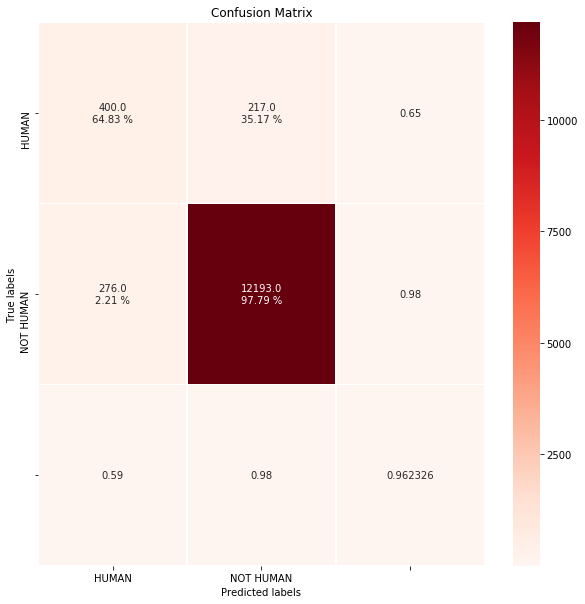

In [11]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(30,), random_state=12,activation="relu")
clf.fit(normalized_X_Human_Non_Human_train,y_Human_Non_Human_train)
result = clf.predict(normalized_X_Human_Non_Human_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(result, y_Human_Non_Human_test)
score = accuracy_score(result, y_Human_Non_Human_test)
labels = ['HUMAN', 'NOT HUMAN']
create_confusion_matrix(result, y_Human_Non_Human_test)
print(cm)
print('Complete accuracy score', score)

In [13]:
# from sklearn.model_selection import cross_val_score

# for i in range(13,50):
#     clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(i,), random_state=12)
#     scores = cross_val_score(clf, normalized_X_Human_Non_Human_train, y_Human_Non_Human_train, cv=4, scoring="accuracy")
#     print("hidden layer", i, "score average", scores.mean())

[[  220    71]
 [  456 12339]]
0.9597279535381323
Precision: Class A 0.76
Precision: Class B 0.96
Recall: Class A 0.33
Recall: Class B 0.99


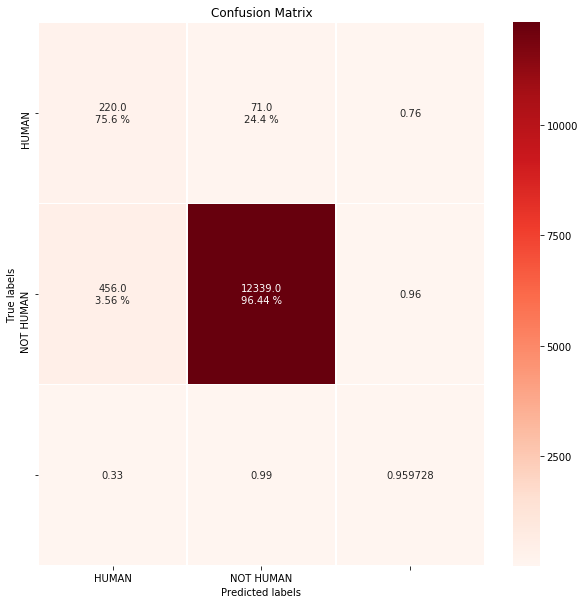

In [14]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=2, random_state=0, n_estimators=100)
clf.fit(normalized_X_Human_Non_Human_train, y_Human_Non_Human_train)
result = clf.predict(normalized_X_Human_Non_Human_test)

cm = confusion_matrix(result, y_Human_Non_Human_test)
print(cm)
print(accuracy_score(result, y_Human_Non_Human_test))
labels = ['HUMAN', 'NOT HUMAN']
create_confusion_matrix(result, y_Human_Non_Human_test)

[[  159    48]
 [  517 12362]]
0.9568240868103316
Precision: Class A 0.77
Precision: Class B 0.96
Recall: Class A 0.24
Recall: Class B 1.0


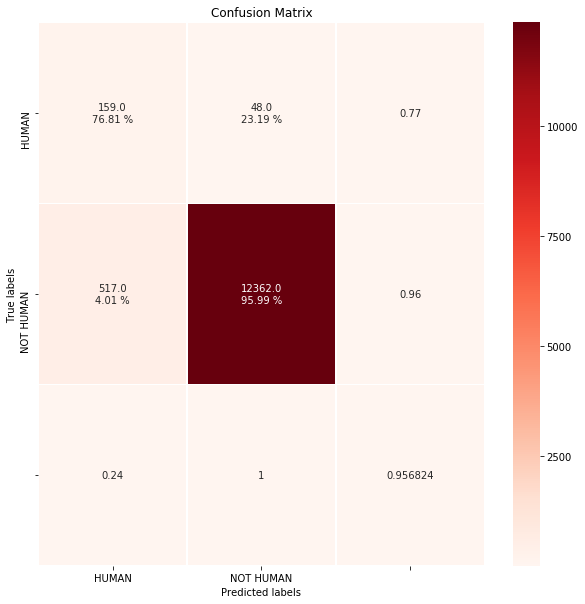

In [15]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(normalized_X_Human_Non_Human_train, y_Human_Non_Human_train)
# print('\nThe number of neighbors used to predict the target : ',clf.n_neighbors)
result = clf.predict(normalized_X_Human_Non_Human_test)

cm = confusion_matrix(result, y_Human_Non_Human_test)
print(cm)
print(accuracy_score(result, y_Human_Non_Human_test))
labels = ['HUMAN', 'NOT HUMAN']
create_confusion_matrix(result, y_Human_Non_Human_test)

[[  230    65]
 [  446 12345]]
0.9609506342656274
Precision: Class A 0.78
Precision: Class B 0.97
Recall: Class A 0.34
Recall: Class B 0.99


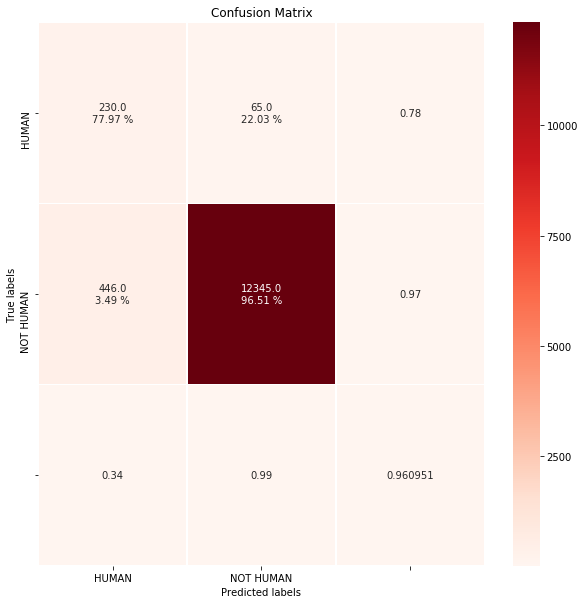

In [17]:
from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(normalized_X_Human_Non_Human_train, y_Human_Non_Human_train)
result = clf.predict(normalized_X_Human_Non_Human_test)

cm = confusion_matrix(result, y_Human_Non_Human_test)
print(cm)
print(accuracy_score(result, y_Human_Non_Human_test))
labels = ['HUMAN', 'NOT HUMAN']
create_confusion_matrix(result, y_Human_Non_Human_test)